### Dataset Information
The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions).<br> The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.preprocessing import image
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import MaxPool2D,Conv2D,Dense,Dropout,Flatten

from sklearn.metrics import classification_report,confusion_matrix

## Data

In [5]:
train_df = pd.read_csv("/home/anshal/Work/ML⁄DL⁄NLP/DL/Sign Language Prediction/Dataset/train.csv")
test_df = pd.read_csv('/home/anshal/Work/ML⁄DL⁄NLP/DL/Sign Language Prediction/Dataset/test.csv')

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [8]:
test_df.shape

(7172, 785)

In [9]:
train_df.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

### Taking a look at  the signs

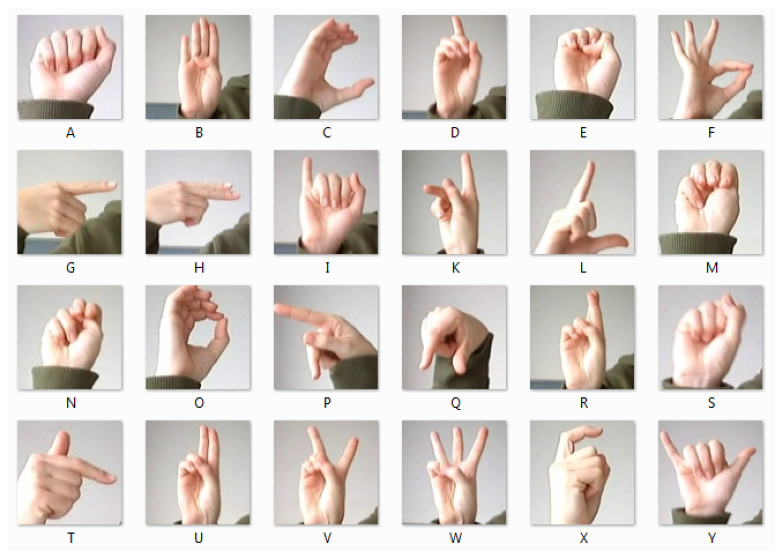

In [10]:
plt.figure(figsize=(15,10))
plt.imshow(Image.open('/home/anshal/Work/ML⁄DL⁄NLP/DL/Sign Language Prediction/Images/signs.png'))
plt.axis('off');

In [11]:
alp = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

pred_class = []
for i in alp:
    pred_class.append(i)

### Distribution of number of data points

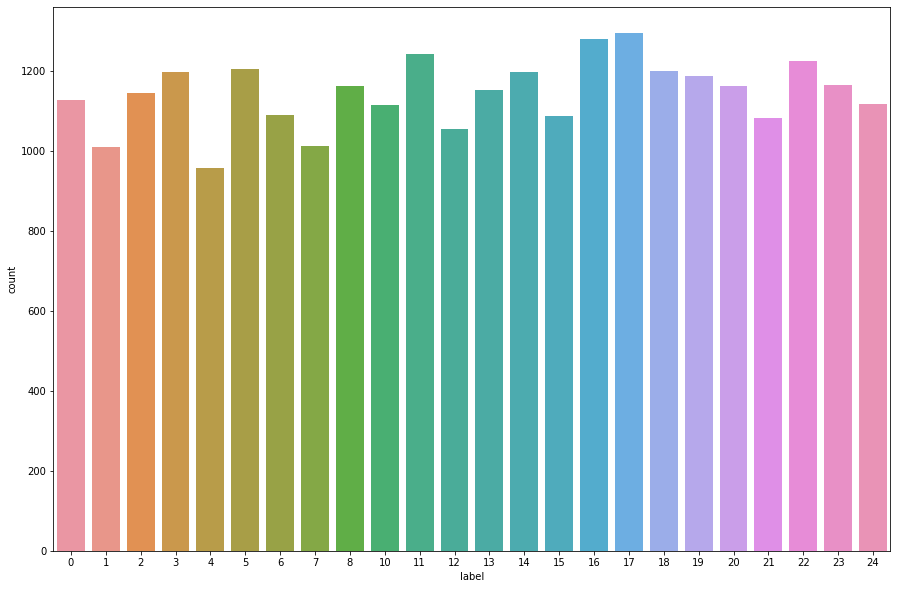

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_df,x='label');

### Splitting target and data values

In [13]:
y_train = train_df['label']
x_train = train_df.drop(columns=['label'])

y_test = test_df['label']
x_test = test_df.drop(columns=['label'])

print(x_train.shape,y_train.shape)

(27455, 784) (27455,)


In [14]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [15]:
x_train.shape[0]

27455

### Reshaping data values

In [16]:
x_train = x_train.values.reshape(x_train.shape[0],28,28,1)
x_test = x_test.values.reshape(x_test.shape[0],28,28,1)

print(x_train.shape,x_test.shape)

(27455, 28, 28, 1) (7172, 28, 28, 1)


**Image Data Generator**

In [17]:
traingen = Imgen(rescale = 1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 brightness_range=[0.85,1.20],
                 rotation_range=20,
                 validation_split=0.2
                )
testgen = Imgen(rescale = 1./255)

In [18]:
train_ds = traingen.flow(x_train,y_train,
                        batch_size = 32,
                        subset='training'
                        )

val_ds = traingen.flow(x_train,y_train,
                        batch_size = 32,
                        subset='validation'
                        )

test_ds = testgen.flow(x_test,y_test,
                       batch_size = 32,
                       shuffle = False
                      )

- Using one batch to visualize

In [19]:
x,y = next(train_ds)

In [20]:
#plot function
def plot_images(images_arr,labels):
    plt.figure(figsize=(15,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images_arr[i])
        plt.title(pred_class[(labels[i])])
        plt.axis('off')

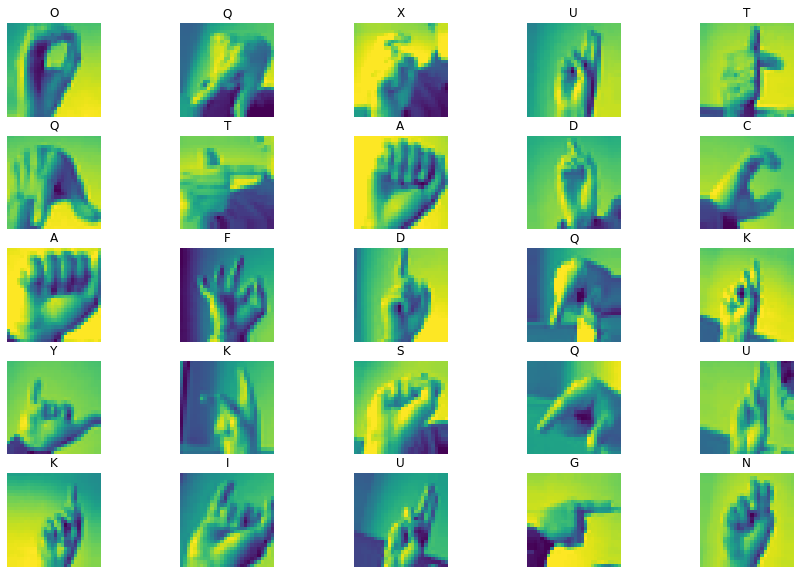

In [21]:
plot_images(x,y)

## Model

In [22]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPool2D(2,2),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D(2,2),
    
    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D(2,2),
    
    Flatten(),
    
    Dense(128,activation='relu'),
    Dropout(0.5),
    
    Dense(64,activation='relu'),
    Dropout(0.5),
    
    Dense(25,activation='softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [24]:
#compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
#callbacks
my_calls = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
            keras.callbacks.ModelCheckpoint("Model.h5",verbose=1,save_best_only=True)]

**Train**

In [26]:
hist = model.fit(train_ds, epochs=21, validation_data=val_ds, callbacks=my_calls)

Epoch 1/21
687/687 [==============================] - 70s 66ms/step - loss: 3.0194 - accuracy: 0.0884 - val_loss: 1.7643 - val_accuracy: 0.4342

Epoch 00001: val_loss improved from inf to 1.76430, saving model to Model.h5
Epoch 2/21
687/687 [==============================] - 41s 59ms/step - loss: 1.8528 - accuracy: 0.3624 - val_loss: 0.9813 - val_accuracy: 0.6480

Epoch 00002: val_loss improved from 1.76430 to 0.98129, saving model to Model.h5
Epoch 3/21
687/687 [==============================] - 43s 62ms/step - loss: 1.2342 - accuracy: 0.5605 - val_loss: 0.7013 - val_accuracy: 0.7554

Epoch 00003: val_loss improved from 0.98129 to 0.70131, saving model to Model.h5
Epoch 4/21
687/687 [==============================] - 43s 63ms/step - loss: 0.9326 - accuracy: 0.6648 - val_loss: 0.5105 - val_accuracy: 0.8288

Epoch 00004: val_loss improved from 0.70131 to 0.51048, saving model to Model.h5
Epoch 5/21
687/687 [==============================] - 42s 61ms/step - loss: 0.7596 - accuracy: 0.728

In [27]:
#test
model.evaluate(test_ds,verbose=1)

225/225 [==============================] - 2s 10ms/step - loss: 0.2418 - accuracy: 0.9286


[0.24177518486976624, 0.9286112785339355]

- Visualizing loss and accuracy trends

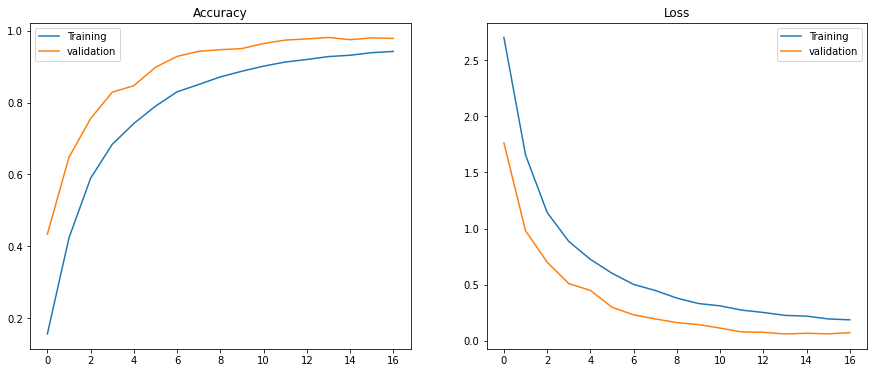

In [28]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

### Test on test data

In [29]:
preds = model.predict(test_ds)

In [30]:
preds = [np.argmax(i) for i in preds]

#### Classification Report

In [31]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       346
           1       1.00      1.00      1.00       432
           2       0.93      0.94      0.94       306
           3       0.87      0.96      0.92       222
           4       1.00      0.98      0.99       510
           5       1.00      1.00      1.00       247
           6       0.80      0.84      0.82       330
           7       0.94      0.89      0.91       465
           8       0.94      0.94      0.94       289
          10       0.92      1.00      0.96       304
          11       1.00      0.89      0.94       235
          12       0.82      1.00      0.90       325
          13       0.91      0.94      0.93       284
          14       0.93      0.91      0.92       250
          15       1.00      0.99      1.00       349
          16       1.00      0.89      0.94       184
          17       0.83      0.87      0.85       137
          18       0.97    

#### Confusion Matrix

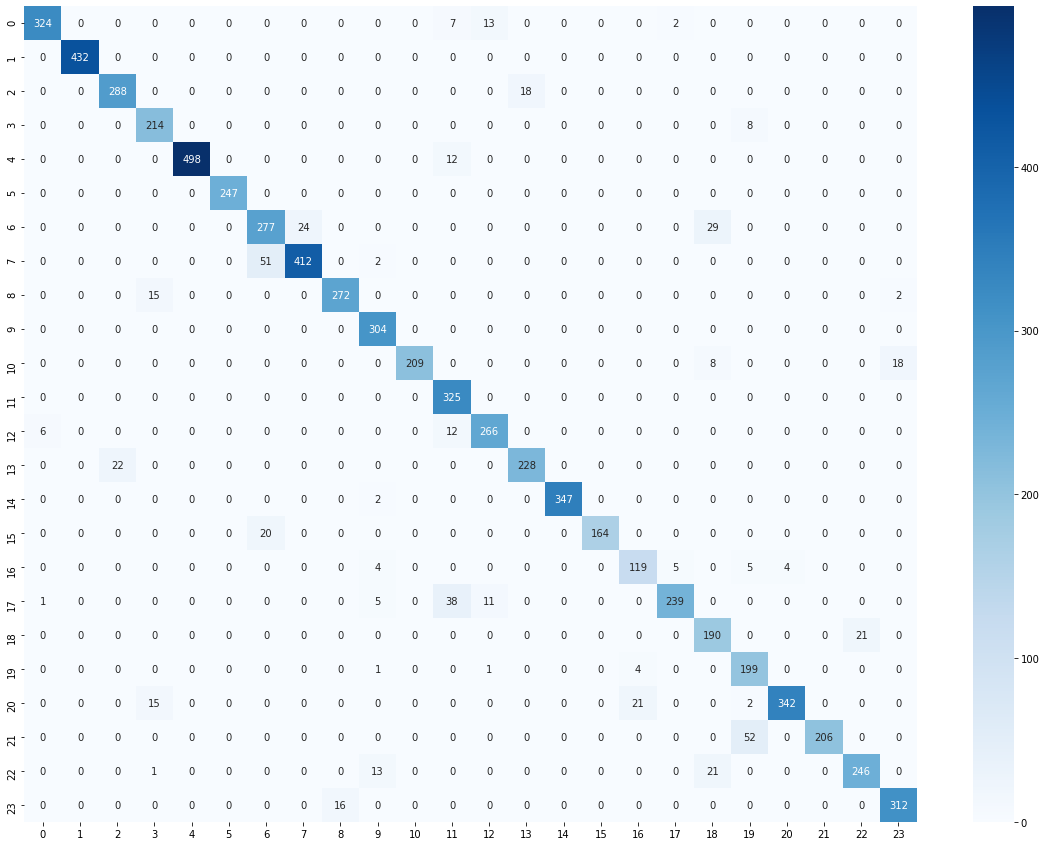

In [32]:
#confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(confusion_matrix(preds,y_test),fmt='d',annot=True,cmap='Blues');

**Visualising Results**

In [33]:
X,Y = next(test_ds)

In [34]:
#plot function
def test_images(images_arr,labels):
    plt.figure(figsize=(15,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images_arr[i])
        plt.xlabel("Actual: {}".format(pred_class[(labels[i])]))
        plt.ylabel("Predicted: {}".format(pred_class[preds[i]]))


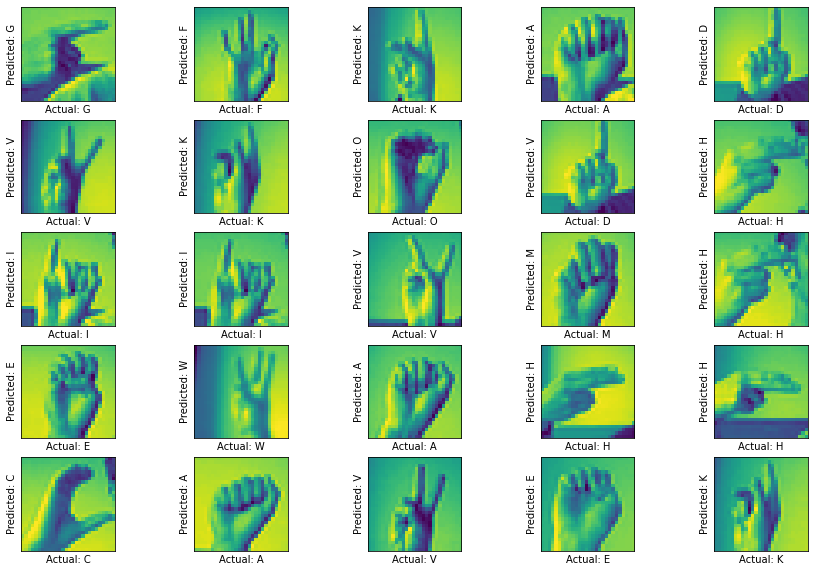

In [35]:
test_images(X,Y)